In [ ]:
# !pip install emoji
# !pip install inflect

In [ ]:
# Load libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import emoji
import inflect
warnings.filterwarnings('ignore')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
# Data source:
# https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
class LoadData:
  @staticmethod
  def load_data(path):
    data = pd.read_csv(path)
    return data

class TextHelpers:
  @staticmethod
  def lower_case(df, col):
    df[col] = df[col].str.lower()
    return df

  @staticmethod
  def remove_digits(df, col):
    df[col] = df[col].astype(str).apply(lambda x: re.sub(r'\d', '', x)) # remove all digits
    return df

  @staticmethod
  def remove_special_chcaracters(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # remove all special characters
    return df

  @staticmethod
  def remove_html_urls(df, col):
    df[col] = df[col].apply(lambda x: re.sub(r'<.*?>', '', x)) # remove all html or urls
    return df

  @staticmethod
  def remove_emojis(df, col):
    df[col] = df[col].apply(lambda x: ' '.join([emoji.demojize(word) for word in x]))
    return df

  @staticmethod
  def convert_numbers_to_words(text):
    words = []
    p = inflect.engine()
    for word in text.split():
        if word.isdigit():
            words.append(p.number_to_words(word))
        else:
            words.append(word)
    return ' '.join(words)

  @staticmethod
  def Tokenize(df, col):
    df[col] = df[col].apply(lambda x: word_tokenize(x))
    return df

  @staticmethod
  def Lemmatization(df, col):
    lemmatizer = WordNetLemmatizer()
    df[col] = df[col].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return df

class RemoveStopWords:
  def __init__(self, custom_stopwords=None):
    self.stop_words = set(stopwords.words('english'))
    if custom_stopwords:
        self.stop_words.update(custom_stopwords)

  def update_stopwords(self, new_stopwords):
    self.stop_words.update(new_stopwords)

  def remove_stopwords(self, df, col):
    df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (self.stop_words)]))
    return df

class Visualization:
  @staticmethod
  def WordCloud(df, col):
    text = ' '.join(df[col])
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

**Data Loading and Exploration**

In [ ]:
# Load data
data = LoadData.load_data('tweet_extraction_sentiment.csv')

Data types and data shape

In [ ]:
# Explore
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


(3534, 3)

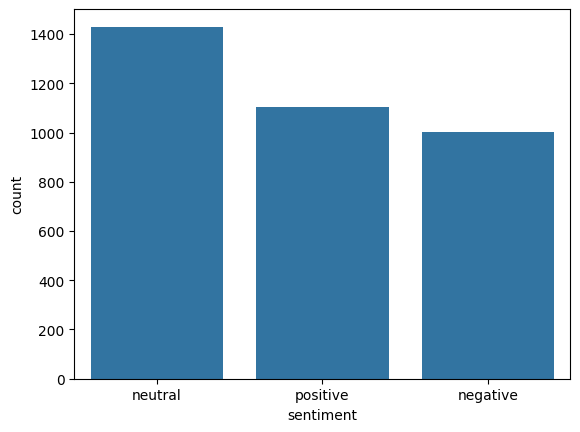

In [ ]:
# Distributions
sns.countplot(x='sentiment', data=data)
plt.show()

Base from the distribution,  'neutral' has the most number of sentiment

In [ ]:
# Print sample rows
data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


       textID                                               text sentiment  \
0  f87dea47db                 last session day httptwitpiccomezh   neutral   
1  96d74cb729  shanghai also really exciting precisely skyscr...  positive   
2  eee518ae67  recession hit veronique branquinho quit compan...  negative   
3  01082688c6                                         happy bday  positive   
4  33987a8ee5                              httptwitpiccomwp like  positive   

   word_count  
0           4  
1          12  
2           7  
3           2  
4           2  


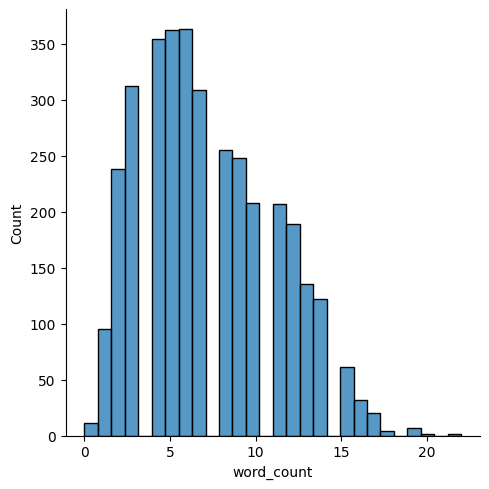

0 22


In [ ]:
# Word count
data['word_count'] = data['text'].str.split().str.len()
print(data.head())
sns.displot(data['word_count'])
plt.show()

# print range of word count
print(data['word_count'].min(), data['word_count'].max())

The word count of 3534 rows has a range between 1 - 22

**Text Cleaning**

In [ ]:
# Convert to lowercase
data = TextHelpers.lower_case(data, 'text')
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,last session of the day http://twitpic.com/67ezh,neutral,6
1,96d74cb729,shanghai is also really exciting (precisely -...,positive,15
2,eee518ae67,"recession hit veronique branquinho, she has to...",negative,13
3,01082688c6,happy bday!,positive,2
4,33987a8ee5,http://twitpic.com/4w75p - i like it!!,positive,5


Lower case conversion ensures consistency in the data, examle: 'Apple' is the same as 'apple' in terms of its context.

In [ ]:
# remove digits
data = TextHelpers.remove_digits(data, 'text')
# remove special characters
data = TextHelpers.remove_special_chcaracters(data, 'text')
# remove html urls
data = TextHelpers.remove_html_urls(data, 'text')
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,last session of the day httptwitpiccomezh,neutral,6
1,96d74cb729,shanghai is also really exciting precisely s...,positive,15
2,eee518ae67,recession hit veronique branquinho she has to ...,negative,13
3,01082688c6,happy bday,positive,2
4,33987a8ee5,httptwitpiccomwp i like it,positive,5


Trade-offs
text consisntecy vs. loss of emotion
Example: Wow! vs. Wow

In [ ]:
# Removing stopwords
RemoveStopWords = RemoveStopWords()
RemoveStopWords.update_stopwords(['the', 'a', 'is', 'of', 'not'])
data = RemoveStopWords.remove_stopwords(data, 'text')
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,last session day httptwitpiccomezh,neutral,6
1,96d74cb729,shanghai also really exciting precisely skyscr...,positive,15
2,eee518ae67,recession hit veronique branquinho quit compan...,negative,13
3,01082688c6,happy bday,positive,2
4,33987a8ee5,httptwitpiccomwp like,positive,5


Example: "I do not like this" becomes "I do like this" after removing "not."

In [ ]:
# Tokenization
data = TextHelpers.Tokenize(data, 'text')
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,"[last, session, day, httptwitpiccomezh]",neutral,6
1,96d74cb729,"[shanghai, also, really, exciting, precisely, ...",positive,15
2,eee518ae67,"[recession, hit, veronique, branquinho, quit, ...",negative,13
3,01082688c6,"[happy, bday]",positive,2
4,33987a8ee5,"[httptwitpiccomwp, like]",positive,5


Tokenization makes it possible for the computer to process or do any further operations on a word/sentence

Text Normalization

In [ ]:
# Lemmatization
data = TextHelpers.Lemmatization(data, 'text')
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,"[last, session, day, httptwitpiccomezh]",neutral,6
1,96d74cb729,"[shanghai, also, really, exciting, precisely, ...",positive,15
2,eee518ae67,"[recession, hit, veronique, branquinho, quit, ...",negative,13
3,01082688c6,"[happy, bday]",positive,2
4,33987a8ee5,"[httptwitpiccomwp, like]",positive,5


I chose lemmatization because it preserves the context of a word rather than removeing prefix an suffix of a word

In [ ]:
# Replacing emojis with their actual meanings
data = TextHelpers.remove_emojis(data, 'text')
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,last session day httptwitpiccomezh,neutral,6
1,96d74cb729,shanghai also really exciting precisely skyscr...,positive,15
2,eee518ae67,recession hit veronique branquinho quit compan...,negative,13
3,01082688c6,happy bday,positive,2
4,33987a8ee5,httptwitpiccomwp like,positive,5


Converting emojis to their actual meaning can bring more metadata in text processing

In [ ]:
data['text'] = data['text'].apply(TextHelpers.convert_numbers_to_words)
data.head()

,textID,text,sentiment,word_count
0,f87dea47db,last session day httptwitpiccomezh,neutral,6
1,96d74cb729,shanghai also really exciting precisely skyscr...,positive,15
2,eee518ae67,recession hit veronique branquinho quit compan...,negative,13
3,01082688c6,happy bday,positive,2
4,33987a8ee5,httptwitpiccomwp like,positive,5


Converting numbers to their words can bring more metadata in text processing

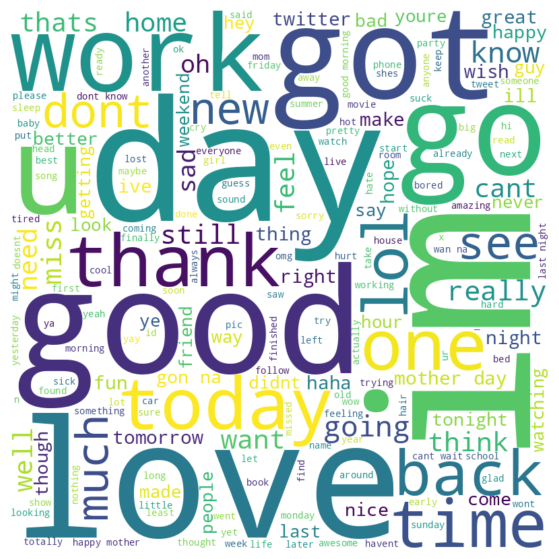

In [ ]:
# Visualize
Visualization.WordCloud(data, 'text')

# Save data to a .csv
data.to_csv("cleaned_data.csv")